In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/abreviations/abbreviations.json
/kaggle/input/embeddings/user_mean_embeddings (1).json
/kaggle/input/dataset-users/users (2).json


In [2]:
import os
import pandas as pd
import numpy as np
import json

In [3]:
data = pd.read_json("/kaggle/input/dataset-users/users (2).json")

In [4]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", 
                       "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", 
                       "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", 
                       "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am",
                       "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", 
                       "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have",
                       "it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not",
                       "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", 
                       "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", 
                       "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
                       "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is",
                       "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would",
                       "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have",
                       "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
                       "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", 
                       "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did",
                       "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", 
                       "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                       "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have",
                       "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have", 'u.s':'america', 'e.g':'for example'}

punct = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-",
                 "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 
                 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', '!':' '}

mispell_dict = {'colour': 'color', 'centre': 'center', 'favourite': 'favorite', 'travelling': 'traveling', 'counselling': 'counseling', 'theatre': 'theater',
                'cancelled': 'canceled', 'labour': 'labor', 'organisation': 'organization', 'wwii': 'world war 2', 'citicise': 'criticize', 'youtu ': 'youtube ',
                'Qoura': 'Quora', 'sallary': 'salary', 'Whta': 'What', 'narcisist': 'narcissist', 'howdo': 'how do', 'whatare': 'what are', 'howcan': 'how can',
                'howmuch': 'how much', 'howmany': 'how many', 'whydo': 'why do', 'doI': 'do I', 'theBest': 'the best', 'howdoes': 'how does', 
                'mastrubation': 'masturbation', 'mastrubate': 'masturbate', "mastrubating": 'masturbating', 'pennis': 'penis', 'Etherium': 'Ethereum', 
                'narcissit': 'narcissist', 'bigdata': 'big data', '2k17': '2017', '2k18': '2018', 'qouta': 'quota', 'exboyfriend': 'ex boyfriend', 
                'airhostess': 'air hostess', "whst": 'what', 'watsapp': 'whatsapp', 'demonitisation': 'demonetization', 'demonitization': 'demonetization',
                'demonetisation': 'demonetization'}

In [5]:
def clean_text(text):
    '''Clean emoji, Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = emoji.demojize(text)
    text = re.sub(r'\:(.*?)\:','',text)
    text = str(text).lower()    #Making Text Lowercase
    text = re.sub('\[.*?\]', '', text)
    #The next 2 lines remove html text
    text = BeautifulSoup(text, 'lxml').get_text()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",", "'")
    text = re.sub(r"[^a-zA-Z?.!,¿']+", " ", text)
    return text

def clean_contractions(text, mapping):
    '''Clean contraction using contraction mapping'''    
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    for word in mapping.keys():
        if ""+word+"" in text:
            text = text.replace(""+word+"", ""+mapping[word]+"")
    #Remove Punctuations
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    text = re.sub(r"([?.!,¿])", r" \1 ", text)
    text = re.sub(r'[" "]+', " ", text)
    return text

def clean_special_chars(text, punct, mapping):
    '''Cleans special characters present(if any)'''   
    for p in mapping:
        text = text.replace(p, mapping[p])
    
    for p in punct:
        text = text.replace(p, f' {p} ')
    
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}  
    for s in specials:
        text = text.replace(s, specials[s])
    
    return text

def correct_spelling(x, dic):
    '''Corrects common spelling errors'''   
    for word in dic.keys():
        x = x.replace(word, dic[word])
    return x

def remove_space(text):
    '''Removes awkward spaces'''   
    #Removes awkward spaces 
    text = text.strip()
    text = text.split()
    return " ".join(text)

def text_preprocessing_pipeline(text):
    '''Cleaning and parsing the text.'''
    text = clean_text(text)
    text = clean_contractions(text, contraction_mapping)
    text = clean_special_chars(text, punct, punct_mapping)
    text = correct_spelling(text, mispell_dict)
    text = remove_space(text)
    return text

In [6]:
users = data[['user_id','username','posts','interests']]

In [7]:
users.head(3)

,user_id,username,posts,interests
0,17841401692602711,Cristiano Ronaldo,"[{'media_type': 'CAROUSEL_ALBUM', 'media_url':...","{'Business and Industry': ['social media', 'Bu..."
1,17841401819740287,Kim Kardashian,"[{'media_type': 'IMAGE', 'media_url': 'https:/...","{'Business and Industry': ['social media', 'Bu..."
2,17841400513960353,𝐃𝐫. 𝐌𝐢𝐤𝐞 𝐕𝐚𝐫𝐬𝐡𝐚𝐯𝐬𝐤𝐢,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...","{'Business and Industry': ['social media', 'He..."


In [8]:
def extract_sub_interests(interests):
    return [interest  for interest in interests]

# Apply the function to the 'interests' column and create a new 'sub_interests' column
users.loc[:, 'sub_interests'] = users['interests'].apply(extract_sub_interests)

/tmp/ipykernel_24/1653614489.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users.loc[:, 'sub_interests'] = users['interests'].apply(extract_sub_interests)


In [9]:
users.head(3)

,user_id,username,posts,interests,sub_interests
0,17841401692602711,Cristiano Ronaldo,"[{'media_type': 'CAROUSEL_ALBUM', 'media_url':...","{'Business and Industry': ['social media', 'Bu...","[Business and Industry, family and relationshi..."
1,17841401819740287,Kim Kardashian,"[{'media_type': 'IMAGE', 'media_url': 'https:/...","{'Business and Industry': ['social media', 'Bu...","[Business and Industry, shopping and fashion]"
2,17841400513960353,𝐃𝐫. 𝐌𝐢𝐤𝐞 𝐕𝐚𝐫𝐬𝐡𝐚𝐯𝐬𝐤𝐢,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...","{'Business and Industry': ['social media', 'He...",[Business and Industry]


In [10]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(users.sub_interests)
labels

array([[1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [11]:
list(mlb.classes_)

['Business and Industry',
 'Entertainment',
 'Outdoors',
 'Technology',
 'family and relationships',
 'fitness and wellness',
 'food and drink',
 'hobbies and activities',
 'shopping and fashion',
 'sports']

In [12]:
df = pd.concat([users[['user_id','username','posts']], pd.DataFrame(labels)], axis=1)
df.columns = ['user_id','username','posts'] + list(mlb.classes_)
df.head()

,user_id,username,posts,Business and Industry,Entertainment,Outdoors,Technology,family and relationships,fitness and wellness,food and drink,hobbies and activities,shopping and fashion,sports
0,17841401692602711,Cristiano Ronaldo,"[{'media_type': 'CAROUSEL_ALBUM', 'media_url':...",1,0,0,0,1,1,0,0,1,1
1,17841401819740287,Kim Kardashian,"[{'media_type': 'IMAGE', 'media_url': 'https:/...",1,0,0,0,0,0,0,0,1,0
2,17841400513960353,𝐃𝐫. 𝐌𝐢𝐤𝐞 𝐕𝐚𝐫𝐬𝐡𝐚𝐯𝐬𝐤𝐢,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...",1,0,0,0,0,0,0,0,0,0
3,17841402089909710,Tyler “Ninja” Blevins,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...",1,1,0,0,0,0,0,0,0,0
4,17841401133162924,American Heart Association,"[{'media_type': 'IMAGE', 'media_url': 'https:/...",1,0,0,0,0,0,0,0,0,0


In [13]:
df

,user_id,username,posts,Business and Industry,Entertainment,Outdoors,Technology,family and relationships,fitness and wellness,food and drink,hobbies and activities,shopping and fashion,sports
0,17841401692602711,Cristiano Ronaldo,"[{'media_type': 'CAROUSEL_ALBUM', 'media_url':...",1,0,0,0,1,1,0,0,1,1
1,17841401819740287,Kim Kardashian,"[{'media_type': 'IMAGE', 'media_url': 'https:/...",1,0,0,0,0,0,0,0,1,0
2,17841400513960353,𝐃𝐫. 𝐌𝐢𝐤𝐞 𝐕𝐚𝐫𝐬𝐡𝐚𝐯𝐬𝐤𝐢,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...",1,0,0,0,0,0,0,0,0,0
3,17841402089909710,Tyler “Ninja” Blevins,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...",1,1,0,0,0,0,0,0,0,0
4,17841401133162924,American Heart Association,"[{'media_type': 'IMAGE', 'media_url': 'https:/...",1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,17841400463380452,Marques Brownlee,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...",0,0,0,1,0,0,0,0,0,0
880,17841400070170876,iPhone Photography School,"[{'media_type': 'CAROUSEL_ALBUM', 'media_url':...",0,0,0,1,0,0,0,0,0,0
881,17841403462026706,Beebom,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...",0,0,0,1,0,0,0,0,0,0
882,17841401804410477,Lewis Hilsenteger,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...",0,0,0,1,0,0,0,0,0,0


In [14]:
df[df.columns[3:]].sum()

Business and Industry       121
Entertainment               113
Outdoors                     59
Technology                   34
family and relationships     57
fitness and wellness         68
food and drink               92
hobbies and activities      187
shopping and fashion        128
sports                      189
dtype: int64

In [15]:
# For our task we remove the categories with small number of articles
columns = df.columns
# Find the frequencies of the articles in every category
categor_freq = df[df.columns[3:]].sum()/df.shape[0]
categor_freq

Business and Industry       0.136878
Entertainment               0.127828
Outdoors                    0.066742
Technology                  0.038462
family and relationships    0.064480
fitness and wellness        0.076923
food and drink              0.104072
hobbies and activities      0.211538
shopping and fashion        0.144796
sports                      0.213801
dtype: float64

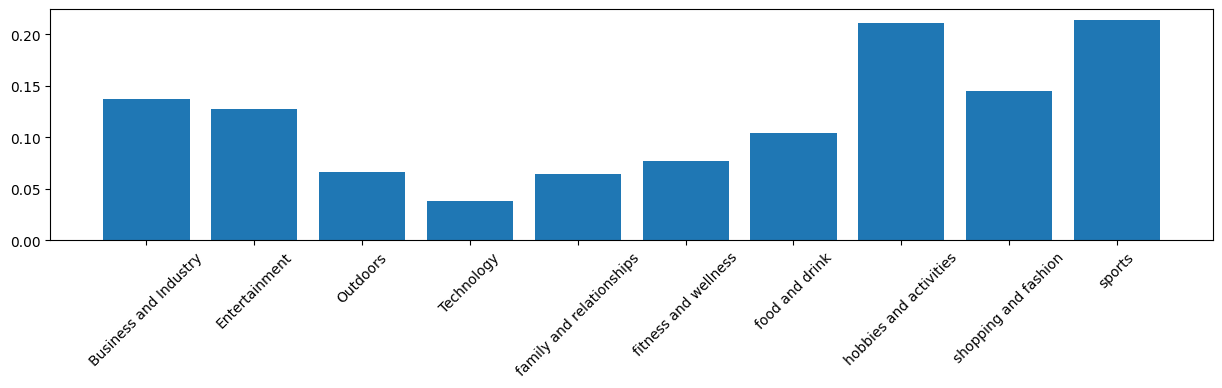

In [16]:
import matplotlib.pyplot as plt
     

plt.rcParams["figure.figsize"] = (15,3)
plt.bar(categor_freq.index, categor_freq.values)
_ = plt.xticks(rotation = 45)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
!nvidia-smi
     

!pip install transformers
     

import os
import pandas as pd
import numpy as np
import shutil
import sys
import tqdm.notebook as tq
from collections import defaultdict

import torch
import torch.nn as nn

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

Sat Jun  1 14:01:30 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [19]:
df.head()

,user_id,username,posts,Business and Industry,Entertainment,Outdoors,Technology,family and relationships,fitness and wellness,food and drink,hobbies and activities,shopping and fashion,sports
0,17841401692602711,Cristiano Ronaldo,"[{'media_type': 'CAROUSEL_ALBUM', 'media_url':...",1,0,0,0,1,1,0,0,1,1
1,17841401819740287,Kim Kardashian,"[{'media_type': 'IMAGE', 'media_url': 'https:/...",1,0,0,0,0,0,0,0,1,0
2,17841400513960353,𝐃𝐫. 𝐌𝐢𝐤𝐞 𝐕𝐚𝐫𝐬𝐡𝐚𝐯𝐬𝐤𝐢,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...",1,0,0,0,0,0,0,0,0,0
3,17841402089909710,Tyler “Ninja” Blevins,"[{'media_type': 'VIDEO', 'thumbnail_url': 'htt...",1,1,0,0,0,0,0,0,0,0
4,17841401133162924,American Heart Association,"[{'media_type': 'IMAGE', 'media_url': 'https:/...",1,0,0,0,0,0,0,0,0,0


In [20]:
def concatenate_captions(posts):
    return ' '.join(post['caption'] for post in posts if post.get('caption'))

# Apply the function to the posts column
df['captions'] = df['posts'].apply(concatenate_captions)

In [21]:
df=df[['Business and Industry',
       'Entertainment', 'Outdoors', 'Technology', 'family and relationships',
       'fitness and wellness', 'food and drink', 'hobbies and activities',
       'shopping and fashion', 'sports', 'captions']]

In [22]:
df

,Business and Industry,Entertainment,Outdoors,Technology,family and relationships,fitness and wellness,food and drink,hobbies and activities,shopping and fashion,sports,captions
0,1,0,0,0,1,1,0,0,1,1,👍😁 Happiness ❤️ Felicidades mi amor te amamos ...
1,1,0,0,0,0,0,0,0,1,0,Happy Birthday Queen kourtneykardash There’s n...
2,1,0,0,0,0,0,0,0,0,0,Now you know why we’re always stressed out 👨🏻‍...
3,1,1,0,0,0,0,0,0,0,0,This kid is NEVER coming back to my stream 🤣 A...
4,1,0,0,0,0,0,0,0,0,0,Scrolling because you’re putting off #springcl...
...,...,...,...,...,...,...,...,...,...,...,...
879,0,0,0,1,0,0,0,0,0,0,Got to try Disney’s infinite moving floor 🤓 Fu...
880,0,0,0,1,0,0,0,0,0,0,Get recognised on Instagram! 🌟\n\nUnlock the p...
881,0,0,0,1,0,0,0,0,0,0,He Attacc. He Protecc. Then He Recharge.✨\n.\n...
882,0,0,0,1,0,0,0,0,0,0,iPhone accessory is… 🔥 AnkerWork S600 - https:...


In [23]:
def replace_abbreviations(text, path):
    with open(path, 'r') as file:
        data = json.load(file)
    abbreviation_dict = data["abbreviation_dict"]
    words = text.split()
    replaced_words = [abbreviation_dict.get(word.upper(), word) for word in words]
    replaced_text = ' '.join(replaced_words)
    return replaced_text

In [24]:
import emoji
from bs4 import BeautifulSoup
import string
import re

df['captions'] = df['captions'].apply(text_preprocessing_pipeline)


/tmp/ipykernel_24/3915360396.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['captions'] = df['captions'].apply(text_preprocessing_pipeline)


In [25]:
df.head(3)

,Business and Industry,Entertainment,Outdoors,Technology,family and relationships,fitness and wellness,food and drink,hobbies and activities,shopping and fashion,sports,captions
0,1,0,0,0,1,1,0,0,1,1,happiness felicidades mi amor te amamos angely...
1,1,0,0,0,0,0,0,0,1,0,happy birthday queen kourtneykardash there s n...
2,1,0,0,0,0,0,0,0,0,0,now you know why we re always stressed out hug...


In [26]:
df.head()

,Business and Industry,Entertainment,Outdoors,Technology,family and relationships,fitness and wellness,food and drink,hobbies and activities,shopping and fashion,sports,captions
0,1,0,0,0,1,1,0,0,1,1,happiness felicidades mi amor te amamos angely...
1,1,0,0,0,0,0,0,0,1,0,happy birthday queen kourtneykardash there s n...
2,1,0,0,0,0,0,0,0,0,0,now you know why we re always stressed out hug...
3,1,1,0,0,0,0,0,0,0,0,this kid is never coming back to my stream afk...
4,1,0,0,0,0,0,0,0,0,0,scrolling because you re putting off springcle...


## Bert

In [27]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [28]:
token = tokenizer.encode_plus(
    df['captions'].iloc[0], 
    max_length=256, 
    truncation=True, 
    padding='max_length', 
    add_special_tokens=True,
    return_tensors='tf'
)

2024-06-01 14:02:56.998917: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-01 14:02:56.999023: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-01 14:02:57.095216: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [29]:
from tqdm.notebook import tqdm  
def tokenize_data(df, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(df['captions']), total=len(df), desc='training', ncols=100):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=256, 
            truncation=True, 
            padding='max_length', 
            add_special_tokens=True,
            return_tensors='tf'
        )
        input_ids[i, :] = tokenized_text.input_ids
        attention_masks[i, :] = tokenized_text.attention_mask
    return input_ids, attention_masks

In [30]:
input_ids = np.zeros((len(df), 256))
attention_masks = np.zeros((len(df), 256))
X_input_ids, X_attn_masks = tokenize_data(df, input_ids, attention_masks, tokenizer)

training:   0%|                                                             | 0/884 [00:00<?, ?it/s]

In [31]:
labels = df[['Business and Industry', 'Entertainment', 'Outdoors', 'Technology', 'family and relationships', 'fitness and wellness', 'food and drink', 'hobbies and activities', 'shopping and fashion', 'sports']].values.astype('int8')
labels.shape

(884, 10)

In [32]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((X_input_ids, X_attn_masks, labels))


In [33]:
dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(10,), dtype=tf.int8, name=None))>

In [34]:
def preprocess_data(input_ids, attention_mask, labels):
    labels = tf.cast(labels, tf.float32)
    return {"input_ids": input_ids, "attention_mask": attention_mask}, labels

In [35]:
dataset = dataset.map(preprocess_data)
dataset

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(256,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(256,), dtype=tf.float64, name=None)}, TensorSpec(shape=(10,), dtype=tf.float32, name=None))>

In [36]:
batch_size = 16
dataset = dataset.shuffle(10000).batch(batch_size, drop_remainder=True) 
dataset

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None)}, TensorSpec(shape=(16, 10), dtype=tf.float32, name=None))>

In [37]:
p = 0.7 
train_size = int((len(df)//batch_size)*p) 
train_size

38

In [38]:
train_dataset = dataset.take(train_size)
val_test_dataset = dataset.skip(train_size)
val_dataset = val_test_dataset.take(len(val_test_dataset)//2)
test_dataset = val_test_dataset.skip(len(val_test_dataset)//2)
#number of batches per dataset
len(train_dataset), len(val_dataset), len(test_dataset)

(38, 8, 9)

In [39]:
from transformers import TFBertModel

model = TFBertModel.from_pretrained('bert-base-cased') 

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [40]:
labels.shape

(884, 10)

In [41]:
train_dataset

<_TakeDataset element_spec=({'input_ids': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None)}, TensorSpec(shape=(16, 10), dtype=tf.float32, name=None))>

In [42]:
# Apply the preprocessing function to the datasets
# train_dataset = train_dataset.map(lambda input_ids, attention_mask, labels: preprocess_data(input_ids, attention_mask, labels))
# val_dataset = val_dataset.map(lambda input_ids, attention_mask, labels: preprocess_data(input_ids, attention_mask, labels))


In [43]:
# defining 2 input layers for input_ids and attn_masks
input_ids = tf.keras.layers.Input(shape=(256,), name='input_ids', dtype='int32')
attn_masks = tf.keras.layers.Input(shape=(256,), name='attention_mask', dtype='int32')

bert_embds = model.bert(input_ids, attention_mask=attn_masks)[1] 
hidden_layer = tf.keras.layers.Dense(512, activation='relu', name='hidden_layer')(bert_embds)
output_layer = tf.keras.layers.Dense(labels.shape[1], activation='sigmoid', name='output_layer')(hidden_layer) 

model = tf.keras.Model(inputs=[input_ids, attn_masks], outputs=output_layer)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 256)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 256)]                0         []                            
 )                                                                                                
                                                                                                  
 bert (TFBertMainLayer)      TFBaseModelOutputWithPooli   1083102   ['input_ids[0][0]',           
                             ngAndCrossAttentions(last_   72         'attention_mask[0][0]']      
                             hidden_state=(None, 256, 7                                       

In [44]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=3e-5)
loss = tf.keras.losses.BinaryCrossentropy()
metrics = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'), 
    tf.keras.metrics.F1Score(name='f1_score')
]

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [45]:
history = model.fit(train_dataset, epochs=10, validation_data=val_dataset, verbose=1, batch_size=batch_size, shuffle=True)

Epoch 1/10
38/38 [==============================] - 101s 1s/step - loss: 0.3849 - accuracy: 0.8579 - f1_score: 0.0985 - val_loss: 0.3330 - val_accuracy: 0.8906 - val_f1_score: 0.1249
Epoch 2/10
38/38 [==============================] - 35s 921ms/step - loss: 0.2897 - accuracy: 0.8951 - f1_score: 0.3258 - val_loss: 0.2151 - val_accuracy: 0.9344 - val_f1_score: 0.4086
Epoch 3/10
38/38 [==============================] - 35s 909ms/step - loss: 0.2149 - accuracy: 0.9278 - f1_score: 0.5160 - val_loss: 0.1641 - val_accuracy: 0.9531 - val_f1_score: 0.6319
Epoch 4/10
38/38 [==============================] - 35s 910ms/step - loss: 0.1544 - accuracy: 0.9516 - f1_score: 0.6513 - val_loss: 0.1465 - val_accuracy: 0.9531 - val_f1_score: 0.7007
Epoch 5/10
38/38 [==============================] - 35s 914ms/step - loss: 0.1297 - accuracy: 0.9605 - f1_score: 0.7478 - val_loss: 0.1044 - val_accuracy: 0.9711 - val_f1_score: 0.8133
Epoch 6/10
38/38 [==============================] - 35s 912ms/step - loss: 0.

In [46]:
import matplotlib.pyplot as plt
def plot_results(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()


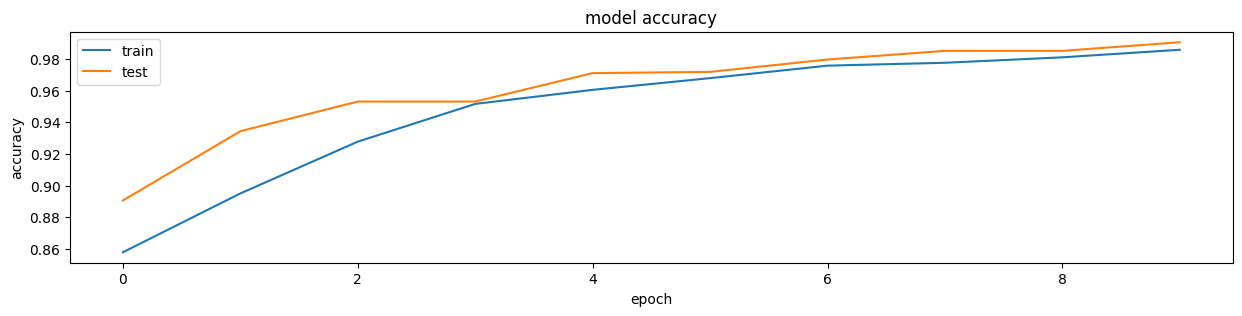

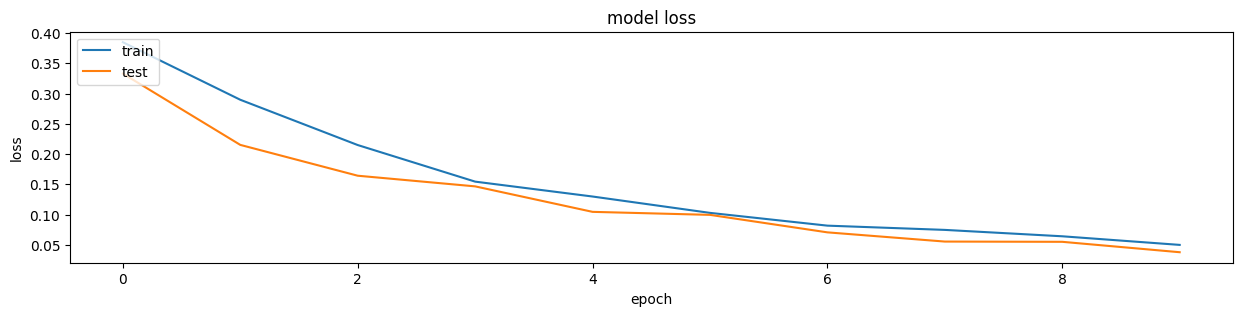

In [47]:
plot_results(history)

In [48]:
def prepare_data(input_text, tokenizer):
    input_text = clean_text(input_text)
    token = tokenizer.encode_plus(
        input_text,
        max_length=256, 
        truncation=True, 
        padding='max_length', 
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': tf.cast(token.input_ids, tf.float64),
        'attention_mask': tf.cast(token.attention_mask, tf.float64)
    }

def make_prediction(model, processed_data, classes=['Business and Industry', 'Entertainment', 'Outdoors', 'Technology', 'family and relationships', 'fitness and wellness', 'food and drink', 'hobbies and activities', 'shopping and fashion', 'sports']):
    probs = model.predict(processed_data)[0]
    threshold = 0.5
    return pd.Series(data=probs, index=classes)[lambda x: x > threshold].sort_values(ascending=False)

In [49]:
# Score the model on the test data and show random samples
# Evaluate the model on the test data
test_loss, test_acc, test_f1 = model.evaluate(test_dataset.take(10), verbose=1)

# Print the test results
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_acc}')
print(f'Test F1 score: {test_f1}')


9/9 [==============================] - 3s 281ms/step - loss: 0.0387 - accuracy: 0.9910 - f1_score: 0.8690
Test loss: 0.03874034434556961
Test accuracy: 0.9909722208976746
Test F1 score: [0.2608696  0.9714286  1.         0.94117653 0.6666667  0.96000004
 1.         0.95238096 0.9777778  0.96      ]


In [50]:
from sklearn.metrics import classification_report, accuracy_score
y_true = []  
y_pred = []  

for batch in test_dataset.take(10):
    inputs, targets = batch
    predictions = model.predict(inputs)
    predicted_labels = np.round(predictions) 
    y_true.extend(targets.numpy().tolist())
    y_pred.extend(predicted_labels.tolist())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

accuracy = accuracy_score(y_true, y_pred)

report = classification_report(y_true, y_pred, target_names=['Business and Industry', 'Entertainment', 'Outdoors', 'Technology', 'family and relationships', 'fitness and wellness', 'food and drink', 'hobbies and activities', 'shopping and fashion', 'sports'], zero_division=0, output_dict=True)

1/1 [==============================] - 0s 289ms/step


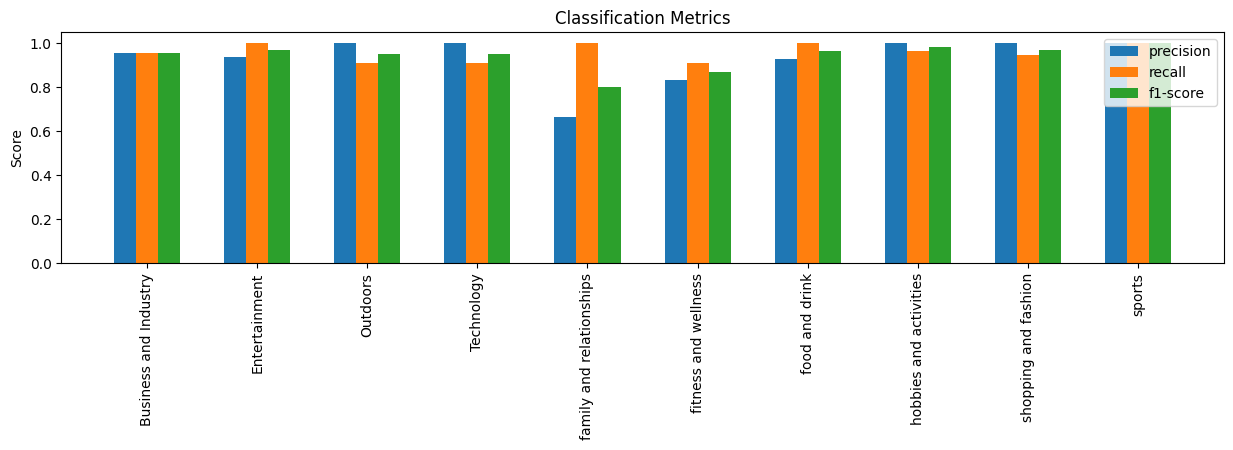

In [51]:
# Extract the metrics from the classification report
class_names = ['Business and Industry', 'Entertainment', 'Outdoors', 'Technology', 'family and relationships', 'fitness and wellness', 'food and drink', 'hobbies and activities', 'shopping and fashion', 'sports']
metrics = ['precision', 'recall', 'f1-score']

fig, ax = plt.subplots()
x = np.arange(len(class_names))
width = 0.2
for i, metric in enumerate(metrics):
    metric_values = [report[class_name][metric] for class_name in class_names]
    ax.bar(x + i * width, metric_values, width, label=metric)

ax.set_xticks(x + width)
ax.set_xticklabels(class_names, rotation=90)
ax.set_ylabel('Score')
ax.set_title('Classification Metrics')
ax.legend()

# Show the plot
plt.show()

In [52]:
print(report['micro avg'])


{'precision': 0.9634146341463414, 'recall': 0.9634146341463414, 'f1-score': 0.9634146341463414, 'support': 164}


In [53]:
model.save('bert_model.h5')  # Saves the entire model to a HDF5 file

/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [54]:
import os
os.chdir(r'/kaggle/working')

In [55]:
%cd /kaggle/working

/kaggle/working


In [56]:
%ls

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


__notebook__.ipynb  bert_model.h5


In [57]:
from IPython.display import FileLink
FileLink(r'bert_model.h5')

/kaggle/working/bert_model.h5

pytorch bert